# Imported Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pd.set_option('display.max_columns', None)

from sklearn import preprocessing
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [153]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [6]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

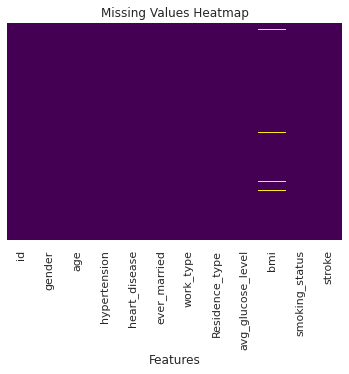

In [198]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Add title
plt.title('Missing Values Heatmap')

# Label the x-axis
plt.xlabel('Features')

# Show the plot
plt.show()

After dropping null values from BMI

Null values exists only in BMI column hence removing all the null values.

In [8]:
df1=df.dropna(axis=0)

Exploring all the column values

Removing outliers

In [9]:
print(df1[df1["gender"] == "Other"])

         id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0  


As only one value with gender as other exists in data hence removing it.

In [10]:
df1 = df1[~(df1["gender"] == "Other")]

In [11]:
df1.gender.unique()

array(['Male', 'Female'], dtype=object)

below are the columns which will be encoded to numerical data.

    gender
    ever_married
    work_type
    Residence_type
    smoking_status



In [12]:
df1['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [13]:
df1 = df1[~df1['smoking_status'].isin(['Unknown'])]


In [14]:
df1['gender_male'] = df1['gender'].replace(['Male', 'Female'],[1,0])

In [15]:
df1['ever_married'] = df1['ever_married'].replace(['Yes', 'No'],[1,0])

In [16]:
df1['Residence_type_urban'] = df1['Residence_type'].replace(['Urban', 'Rural'],[1,0])

Feature Engineering:

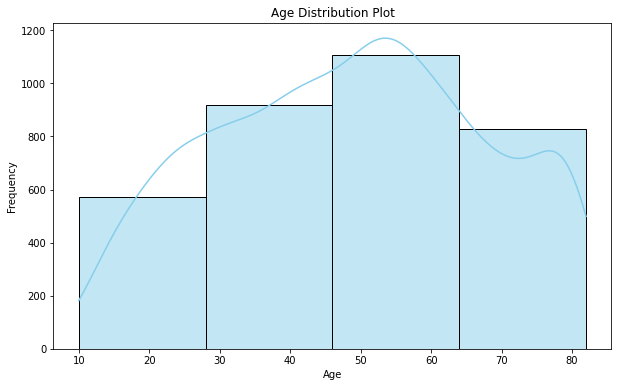

In [17]:
# Assuming 'df' is your DataFrame with the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(df1['age'], bins=4, kde=True, color='skyblue')
plt.title('Age Distribution Plot')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [18]:
age_bins = [0, 25, 45, 61, 82] 
age_labels = ['0-25', '26-45', '46-61', '62-82']

In [19]:
# Create a new column 'age_group' with the bin labels
df1['age_group'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [20]:
# Display the first few rows of the DataFrame with the new 'age_group' column
print(df1[['age', 'age_group']].head())

    age age_group
0  67.0     62-82
2  80.0     62-82
3  49.0     46-61
4  79.0     62-82
5  81.0     62-82


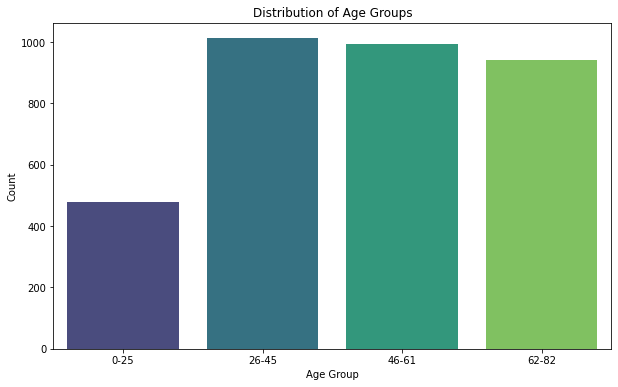

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df1, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

The models that we have in plan can handle ordinal encoding, hence we will be using ordinal encoding for this column

Age distribution 
As it is can be seen in graphs, it is observed the majority of patients in this sample lies in age groups 26-45, 46-61 and 62-82. the Population of patients between 0-25 is very less as compared to other groups. 
In Histogram, Figure 4.5 Age Distribution Plot it can be clearly seen the major population lies between 35-65.  

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
ordinal_encoder = OrdinalEncoder(categories=[['0-25', '26-45', '46-61', '62-82']])
df1['age_group_encoded'] = ordinal_encoder.fit_transform(df1[['age_group']])

In [24]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_male', 'Residence_type_urban',
       'age_group', 'age_group_encoded'],
      dtype='object')

In [25]:
bmi_bins = [0, 18.5, 24.9, 29.9, 100]  # Adjust these bins based on your requirements
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
# Create a new column 'bmi_category' with the bin labels
df1['bmi_category'] = pd.cut(df1['bmi'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)

# Display the first few rows of the DataFrame with the new 'bmi_category' column
print(df1[['bmi', 'bmi_category']].head())

    bmi bmi_category
0  36.6        Obese
2  32.5        Obese
3  34.4        Obese
4  24.0       Normal
5  29.0   Overweight


In [26]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_male', 'Residence_type_urban',
       'age_group', 'age_group_encoded', 'bmi_category'],
      dtype='object')

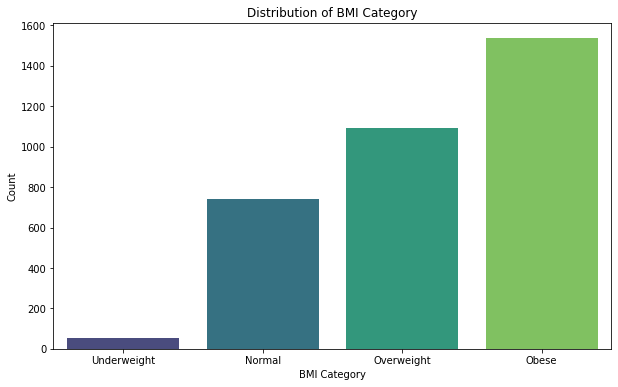

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_category', data=df1, palette='viridis')
plt.title('Distribution of BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

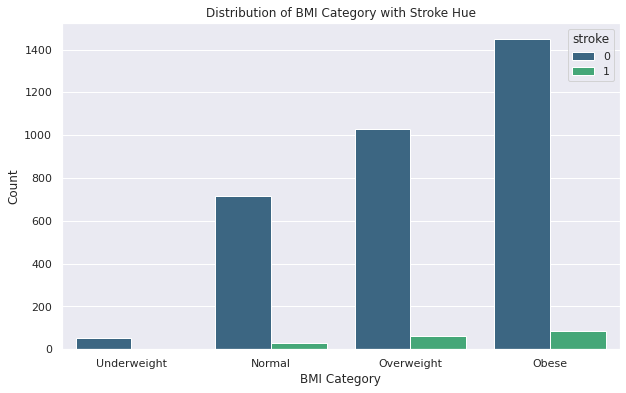

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_category', hue='stroke', data=df1, palette='viridis')
plt.title('Distribution of BMI Category with Stroke Hue')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


In [ ]:
After Categorizing the BMI of patients and it is observed that most of the patients with Stroke history are overweight and obese

In [28]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_male', 'Residence_type_urban',
       'age_group', 'age_group_encoded', 'bmi_category'],
      dtype='object')

In [29]:
dummies = pd.get_dummies(df1, columns = ["work_type", "smoking_status","bmi_category"])

In [30]:
df2 = dummies

Dropping useless columns

In [31]:
df2.head(1)

id gender   age  hypertension  heart_disease  ever_married  \
0  9046   Male  67.0             0              1             1   

  Residence_type  avg_glucose_level   bmi  stroke  gender_male  \
0          Urban             228.69  36.6       1            1   

   Residence_type_urban age_group  age_group_encoded  work_type_Govt_job  \
0                     1     62-82                3.0                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   

   work_type_children  smoking_status_formerly smoked  \
0                   0                               1   

   smoking_status_never smoked  smoking_status_smokes  \
0                            0                      0   

   bmi_category_Underweight  bmi_category_Normal  bmi_category_Overweight  \
0                         0                    0                        0   

   bmi_category_Obese  
0                   1

### Firstly want to understand the effect of Feature  Engineering on accuracy or not. Hence creating a data frame with original columns and one dataframe with Feature engineered columns.

In [32]:
#Dataframe with no feature  engineered column
df_org = df2[['age','hypertension','heart_disease','ever_married','avg_glucose_level',
    'bmi','stroke','gender_male','Residence_type_urban','work_type_Govt_job',
    'work_type_Never_worked','work_type_Private','work_type_Self-employed',
    'work_type_children','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]

In [33]:

df_org.head()

age  hypertension  heart_disease  ever_married  avg_glucose_level   bmi  \
0  67.0             0              1             1             228.69  36.6   
2  80.0             0              1             1             105.92  32.5   
3  49.0             0              0             1             171.23  34.4   
4  79.0             1              0             1             174.12  24.0   
5  81.0             0              0             1             186.21  29.0   

   stroke  gender_male  Residence_type_urban  work_type_Govt_job  \
0       1            1                     1                   0   
2       1            1                     0                   0   
3       1            0                     1                   0   
4       1            0                     0                   0   
5       1            1                     1                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   
5                       0                  1                        0   

   work_type_children  smoking_status_formerly smoked  \
0                   0                               1   
2                   0                               0   
3                   0                               0   
4                   0                               0   
5                   0                               1   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0  
5                            0                      0

In [34]:
#dataframe with feature engineered column
df2.drop(['id','gender','age','Residence_type','age_group','bmi'], axis=1, inplace =True)
df2.head()

hypertension  heart_disease  ever_married  avg_glucose_level  stroke  \
0             0              1             1             228.69       1   
2             0              1             1             105.92       1   
3             0              0             1             171.23       1   
4             1              0             1             174.12       1   
5             0              0             1             186.21       1   

   gender_male  Residence_type_urban  age_group_encoded  work_type_Govt_job  \
0            1                     1                3.0                   0   
2            1                     0                3.0                   0   
3            0                     1                2.0                   0   
4            0                     0                3.0                   0   
5            1                     1                3.0                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   
5                       0                  1                        0   

   work_type_children  smoking_status_formerly smoked  \
0                   0                               1   
2                   0                               0   
3                   0                               0   
4                   0                               0   
5                   0                               1   

   smoking_status_never smoked  smoking_status_smokes  \
0                            0                      0   
2                            1                      0   
3                            0                      1   
4                            1                      0   
5                            0                      0   

   bmi_category_Underweight  bmi_category_Normal  bmi_category_Overweight  \
0                         0                    0                        0   
2                         0                    0                        0   
3                         0                    0                        0   
4                         0                    1                        0   
5                         0                    0                        1   

   bmi_category_Obese  
0                   1  
2                   1  
3                   1  
4                   0  
5                   0

In [35]:
df2.isna().sum()

hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
stroke                            0
gender_male                       0
Residence_type_urban              0
age_group_encoded                 0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
bmi_category_Underweight          0
bmi_category_Normal               0
bmi_category_Overweight           0
bmi_category_Obese                0
dtype: int64

In [36]:
df_org.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_male                       0
Residence_type_urban              0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

Doing EDA

In [147]:

sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings


In [148]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

In [151]:
data = df.dropna(how='any')
data.head(2)

id gender   age  hypertension  heart_disease ever_married work_type  \
0   9046   Male  67.0             0              1          Yes   Private   
2  31112   Male  80.0             0              1          Yes   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1

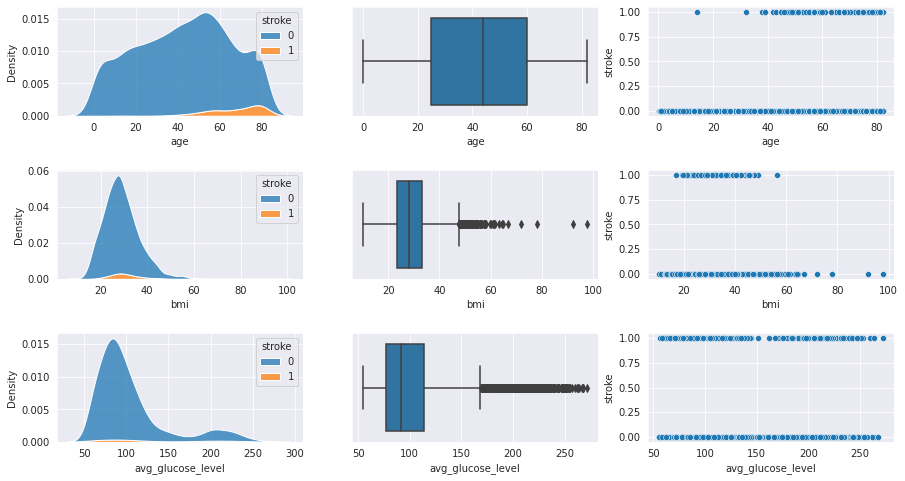

In [154]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=data, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=num_col, data=data, ax=ax[i, 1])
    sns.scatterplot(x=num_col, y='stroke', data=data, ax=ax[i, 2])
    i+=1
plt.show()

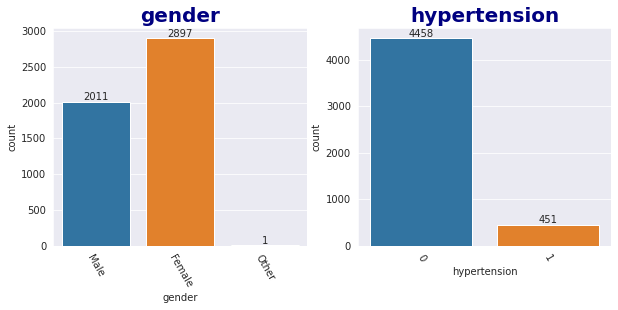

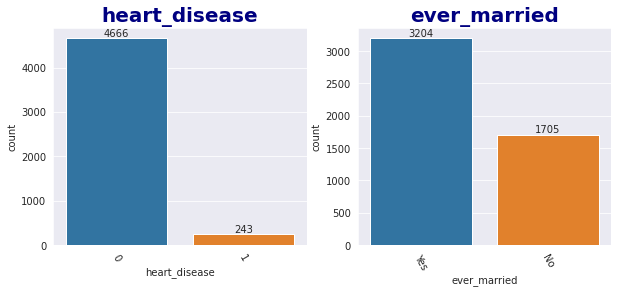

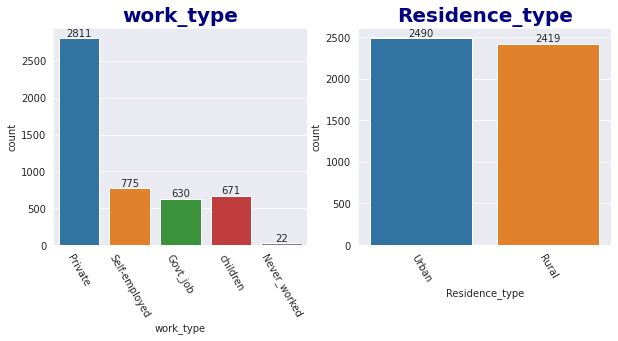

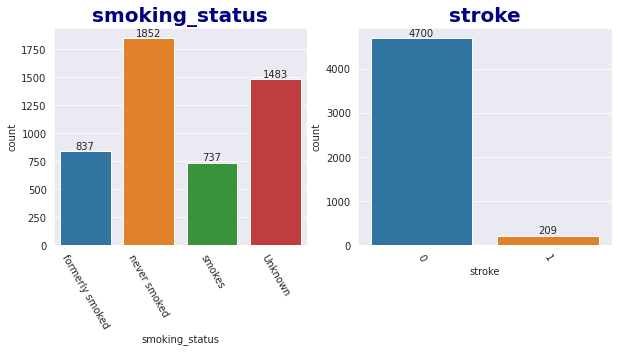

In [155]:
i=0
while i<8 :
    
    # Left AX
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    
    # Right AX
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

Analysing the data for all the independent variables and observe how they are related to each other or with the 

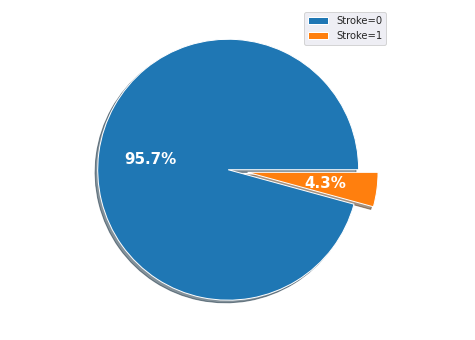

In [156]:
x = data['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

In [157]:
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp :
    print('column :', col)
    for index, unique in enumerate(data[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : gender
Male : 0
Female : 1
Other : 2
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


In [220]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()


### Another EDA


<AxesSubplot:>

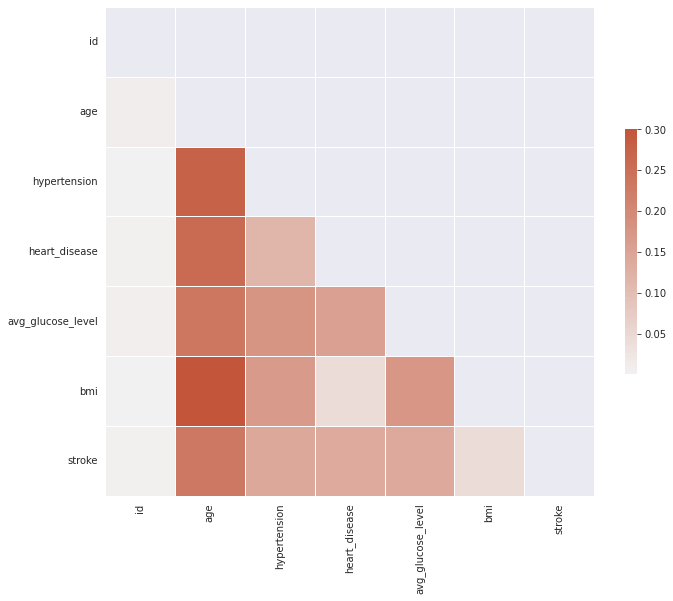

In [159]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
In Figure 4.8 Correlation Matrix, it can be clearly seen that the storke is correlated to age, hypertension, heart_disease, avg_glucose_level and bmi
these features are important in classifying the stroke. 

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


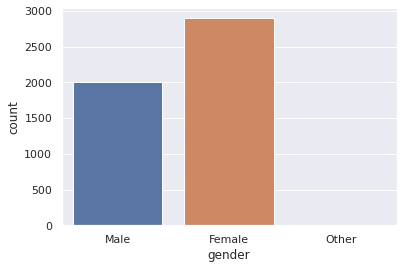

In [210]:
print(data.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="gender")
plt.show()

In [163]:
dataset = data

0    4458
1     451
Name: hypertension, dtype: int64


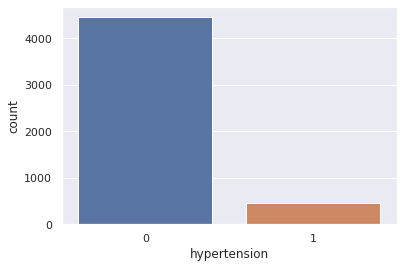

In [209]:
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

Yes    3204
No     1705
Name: ever_married, dtype: int64


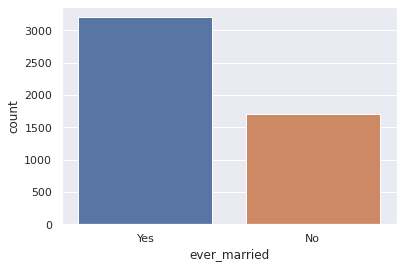

In [208]:
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


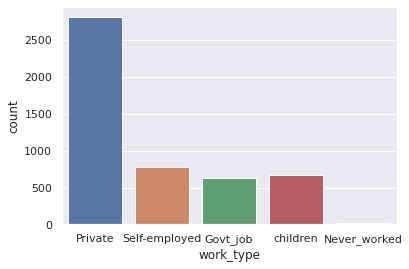

In [207]:
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64


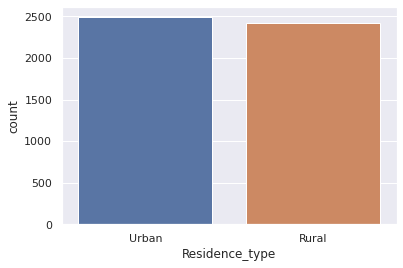

In [206]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


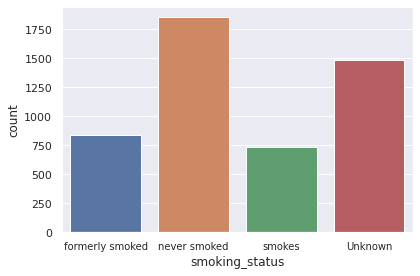

In [205]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

0    4700
1     209
Name: stroke, dtype: int64


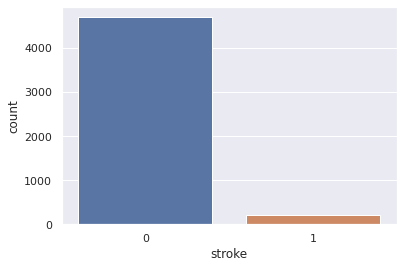

In [170]:
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

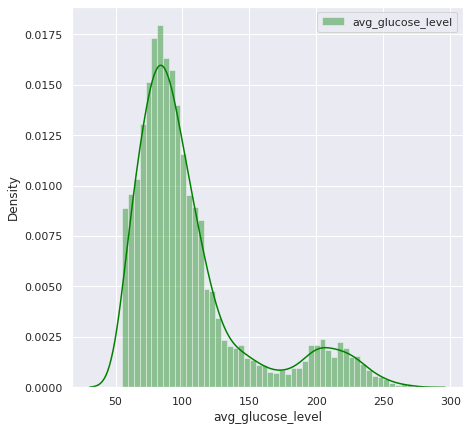

In [171]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

for avg_glucose_level attribute it can be seen that data is right skewed as most of the population lies in 50-150 range. This can observed in Figure 4.13

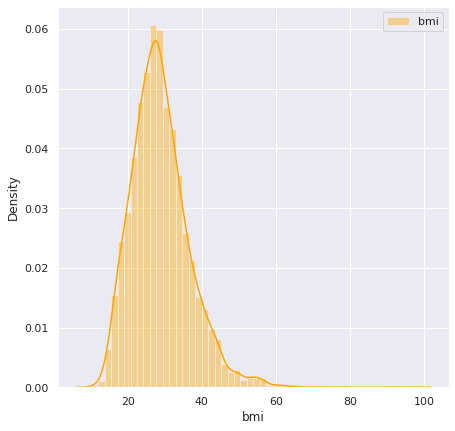

In [172]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

for bmi attribute it can be seen that data is right skewed as most of the population lies in 20-40 range. This can observed in Figure 4.14

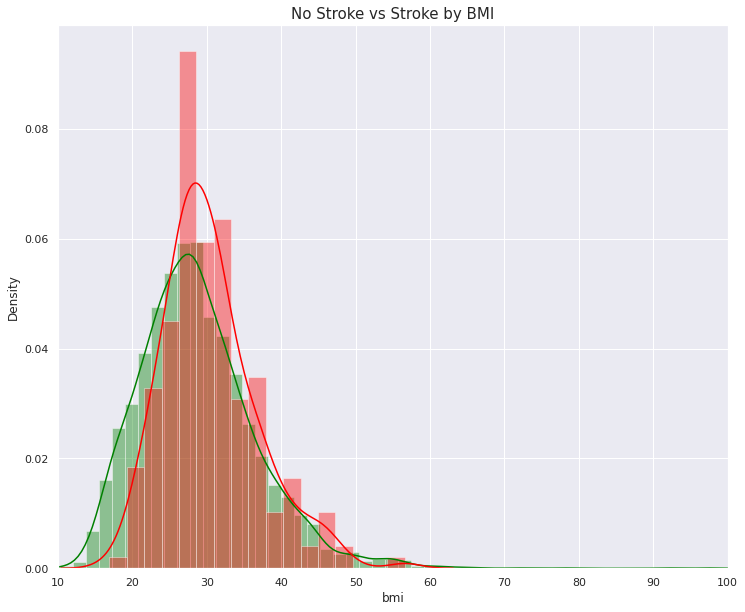

In [175]:
#From the graph, it shows that the density of overweight people who suffered a stroke is more.

plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

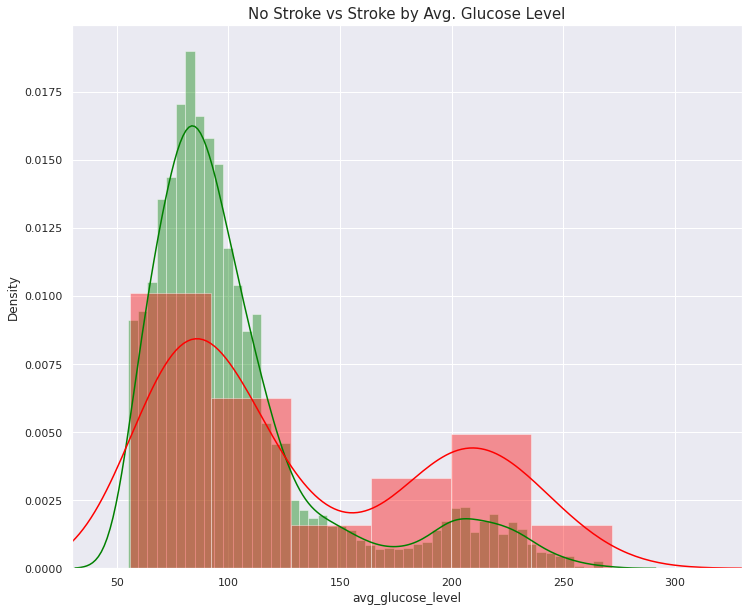

In [174]:
#From Figure 4.15, it shows that the density of people having glucose level less than 100 suffered stroke more.

plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

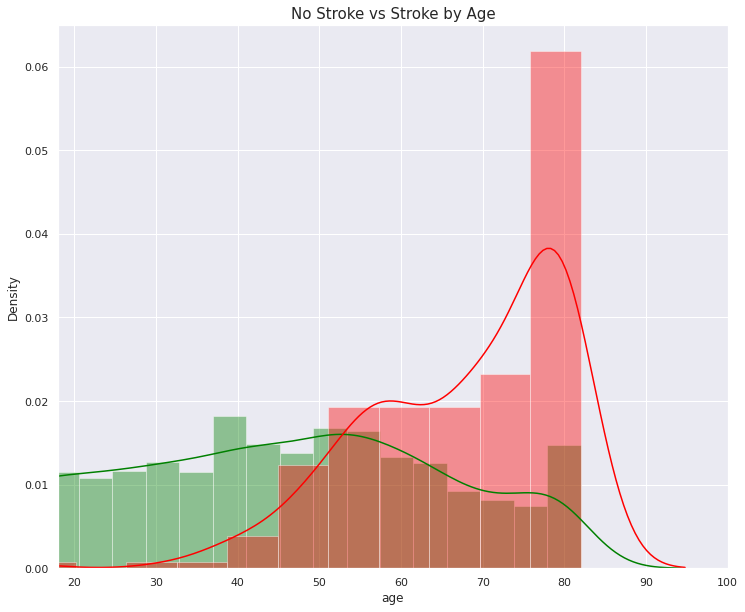

In [176]:
#From figure 4.16, it can be seen that the density of people having age above 50 suffered stroke more.

plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

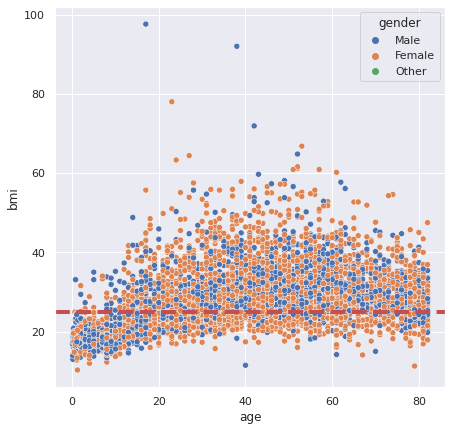

In [177]:
#From above plot, we can see that there are lot of people having BMI above 25 are overweight and obese.
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

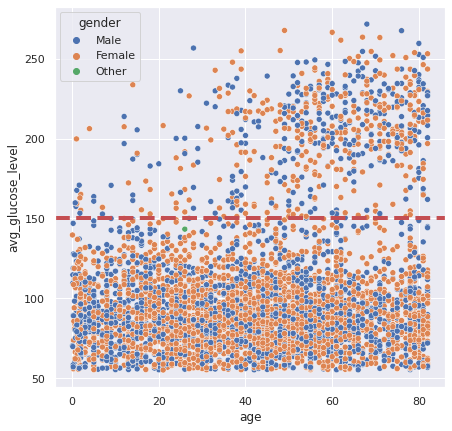

In [179]:
#From above plot, we can see that people having glucose level above 150 are relatively less as compare one below. So, we can say that people above 150 might be suffering from diabetes.
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

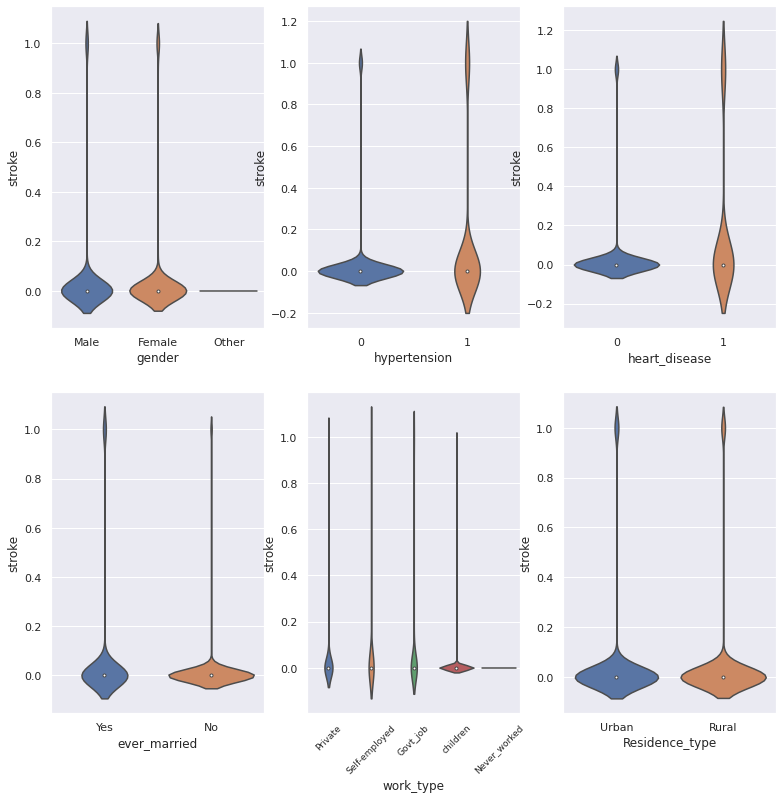

In [180]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = dataset)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = dataset)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = dataset)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = dataset)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = dataset)
plt.show()

<Figure size 720x720 with 0 Axes>

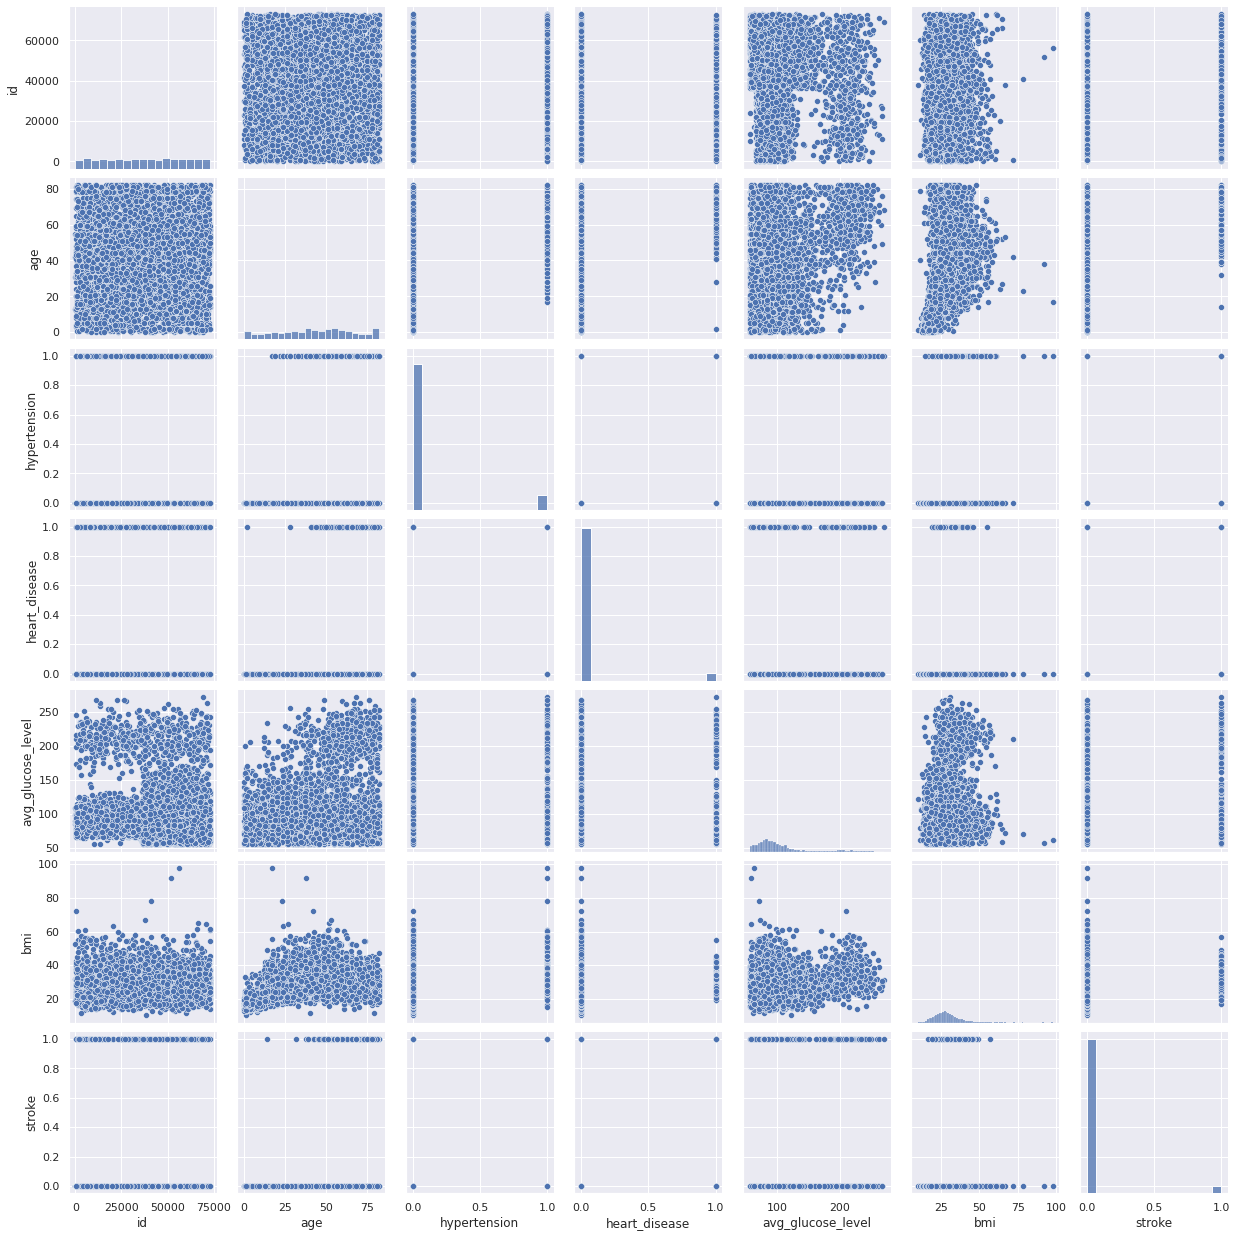

In [181]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset)
plt.show()

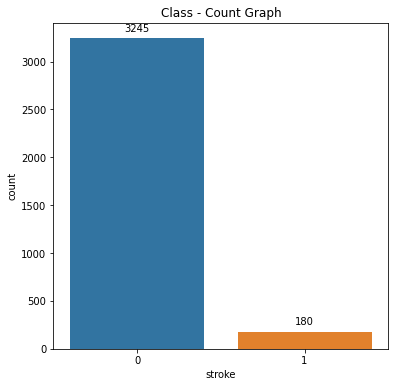

In [37]:
# Assuming 'df2' is your DataFrame
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='stroke', data=df2)

# Annotate each bar with its count using sns.barplot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('stroke')
plt.title('Class - Count Graph')
plt.show()

In [38]:
df2['stroke'].value_counts()

0    3245
1     180
Name: stroke, dtype: int64

In [39]:
df_org['stroke'].value_counts()

0    3245
1     180
Name: stroke, dtype: int64

In [40]:
df_org.head(2)

age  hypertension  heart_disease  ever_married  avg_glucose_level   bmi  \
0  67.0             0              1             1             228.69  36.6   
2  80.0             0              1             1             105.92  32.5   

   stroke  gender_male  Residence_type_urban  work_type_Govt_job  \
0       1            1                     1                   0   
2       1            1                     0                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
2                       0                  1                        0   

   work_type_children  smoking_status_formerly smoked  \
0                   0                               1   
2                   0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
2                            1                      0

In [41]:
#normalizing data for original columns' dataframe

scaler = StandardScaler()
columns = ["age","avg_glucose_level","bmi"]
df3 = df_org.copy()
df3[columns] = scaler.fit_transform(df3[columns])
df3.head()

age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  0.973480             0              1             1           2.523666   
2  1.663236             0              1             1          -0.050140   
3  0.018435             0              0             1           1.319048   
4  1.610178             1              0             1           1.379636   
5  1.716294             0              0             1           1.633096   

        bmi  stroke  gender_male  Residence_type_urban  work_type_Govt_job  \
0  0.864688       1            1                     1                   0   
2  0.302637       1            1                     0                   0   
3  0.563100       1            0                     1                   0   
4 -0.862591       1            0                     0                   0   
5 -0.177163       1            1                     1                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   
5                       0                  1                        0   

   work_type_children  smoking_status_formerly smoked  \
0                   0                               1   
2                   0                               0   
3                   0                               0   
4                   0                               0   
5                   0                               1   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0  
5                            0                      0

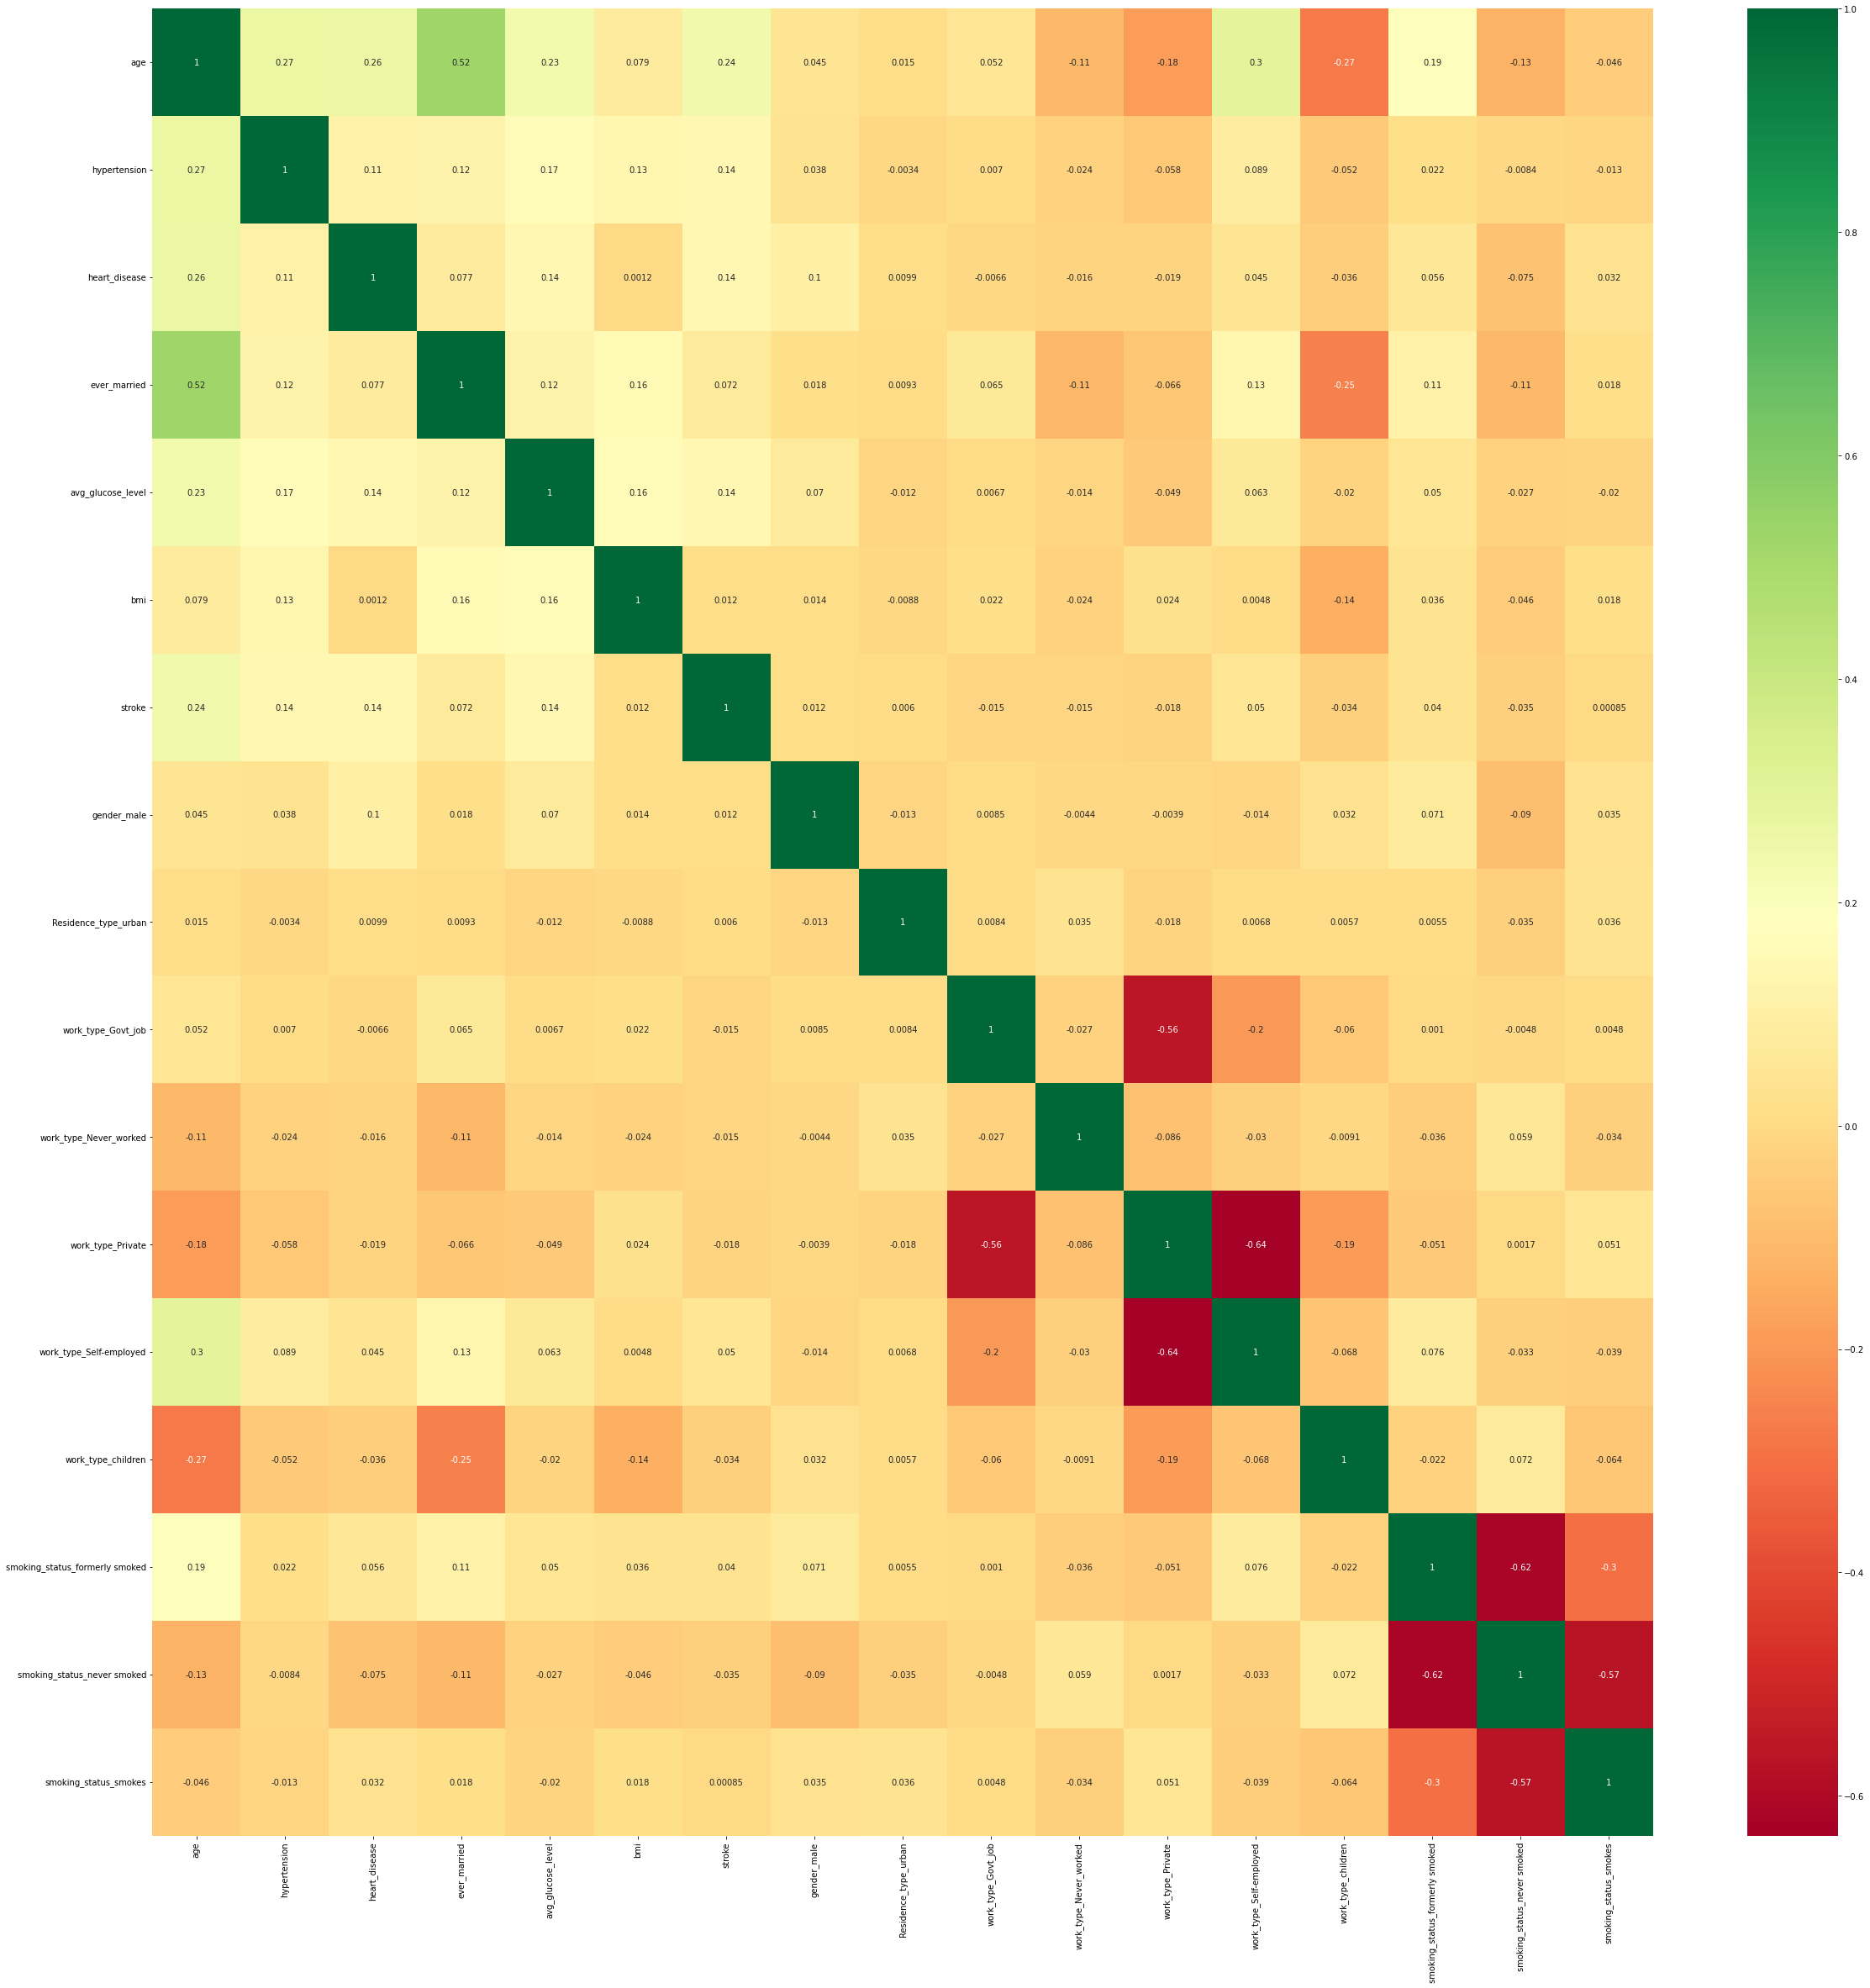

In [43]:
#get correlations of each features in dataset with original column dataframe
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Text(0.5, 1.02, 'Feature Distribution')

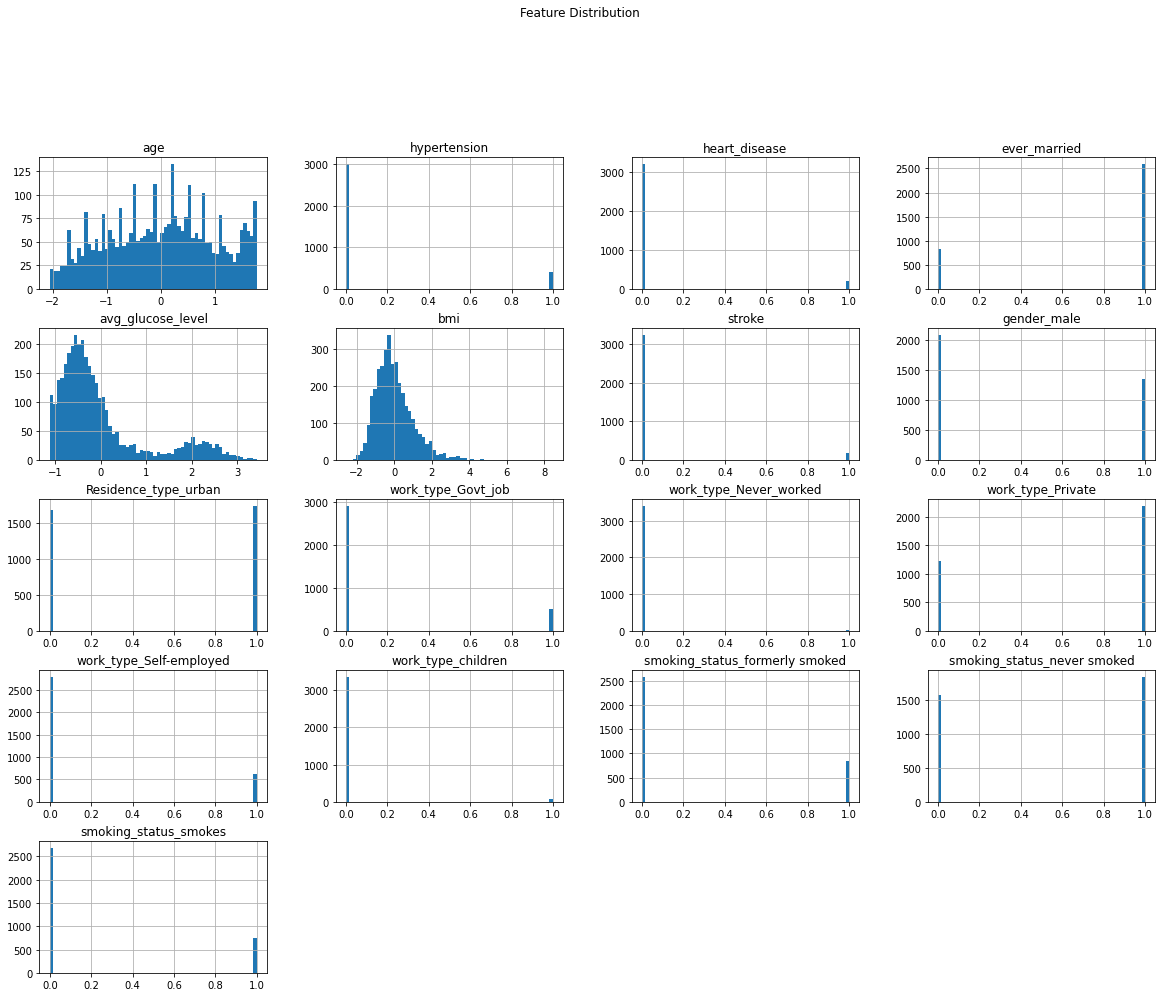

In [44]:
df3.hist(bins = 60, figsize = (20, 15))
plt.suptitle("Feature Distribution", x = 0.5, y = 1.02, ha = "center")

Text(0.5, 1.02, 'Feature Distribution')

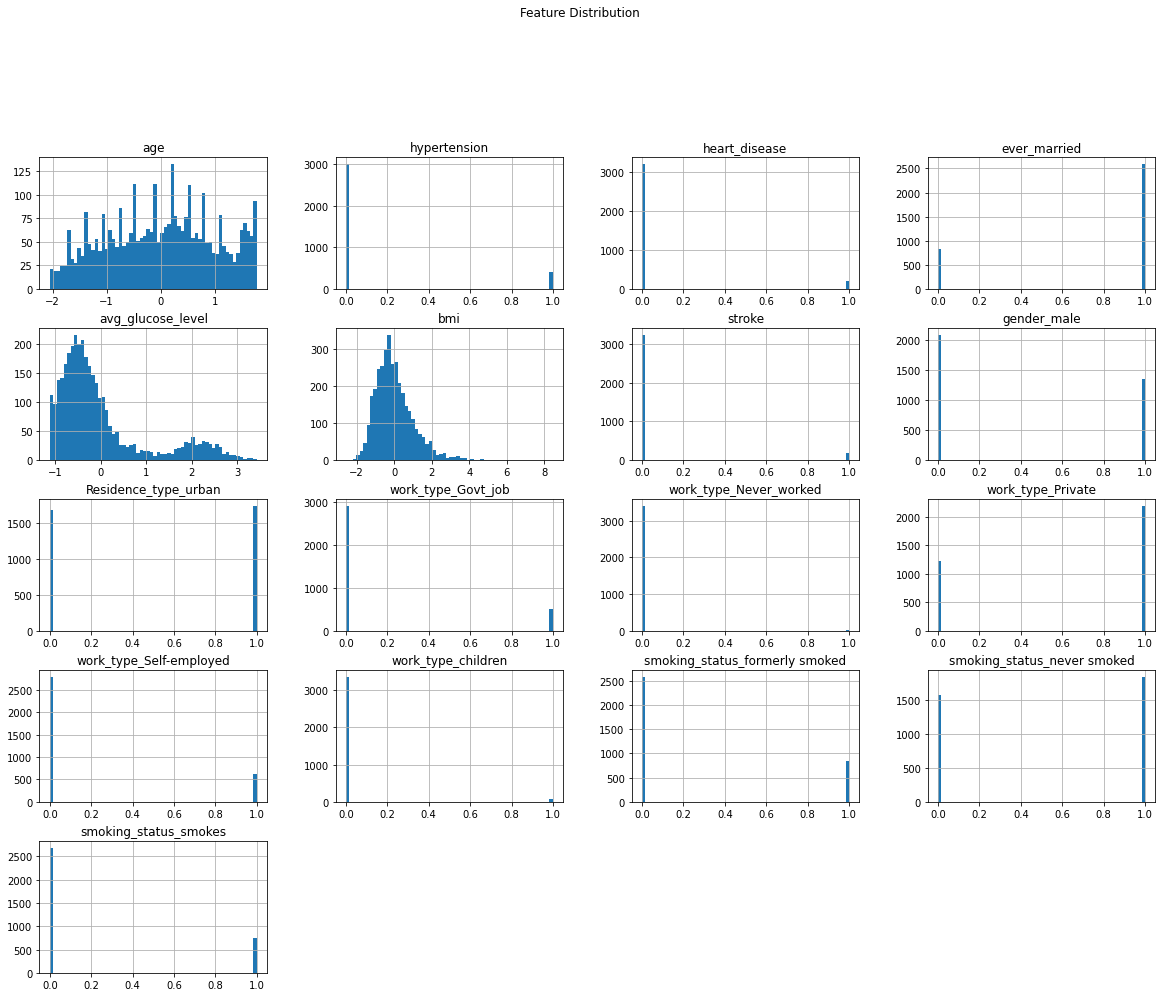

In [45]:
df3.hist(bins = 60, figsize = (20, 15))
plt.suptitle("Feature Distribution", x = 0.5, y = 1.02, ha = "center")

Text(0.5, 0.98, 'Feature Distribution')

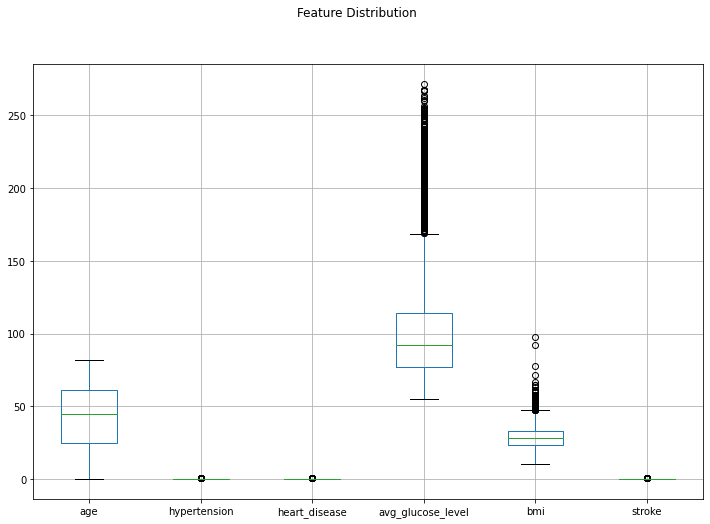

In [46]:
vis_df = df.drop(["id"], axis = 1)
vis_df.boxplot(figsize = (12, 8))
plt.suptitle("Feature Distribution")

In [47]:
def pieplot(df, column):
    label = df[column].unique().tolist()
    data = df[column].value_counts()
    plt.figure(figsize = (5, 5))
    plt.pie(data, labels = label, autopct = "%.0f%%")
    plt.title(column)
    plt.show()

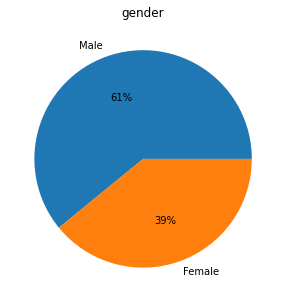

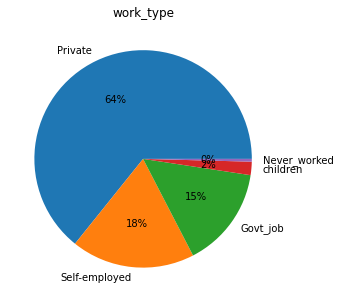

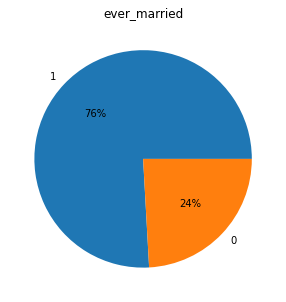

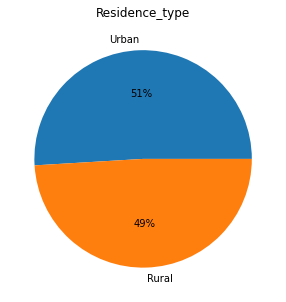

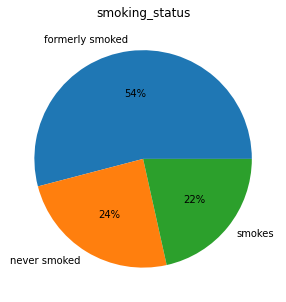

In [48]:
lists_of_plots = ["gender", "work_type", "ever_married", "Residence_type", "smoking_status"]
for i in range(len(lists_of_plots)):
    pieplot(df1, lists_of_plots[i])

[]

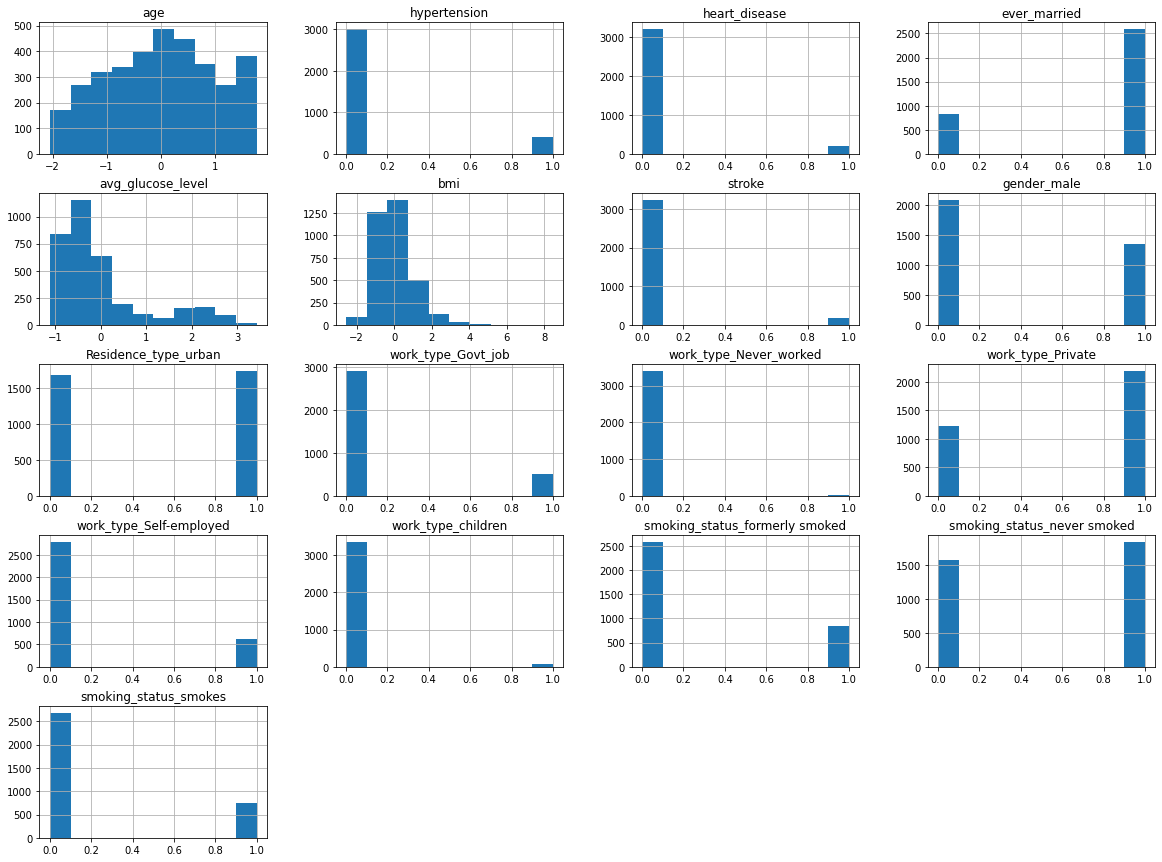

In [49]:
df3.hist(figsize=(20,15),)
plt.plot()

[]

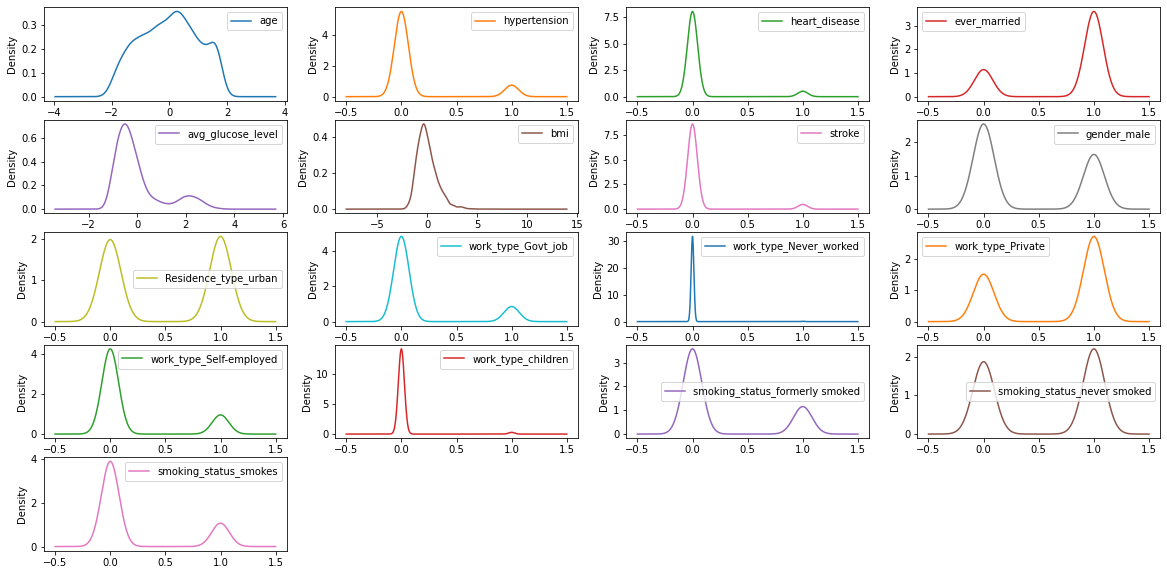

In [51]:
df3.plot(kind='kde', subplots=True, figsize=(20,10),
              layout=(-1, 4), sharex=False)
plt.plot()

[]

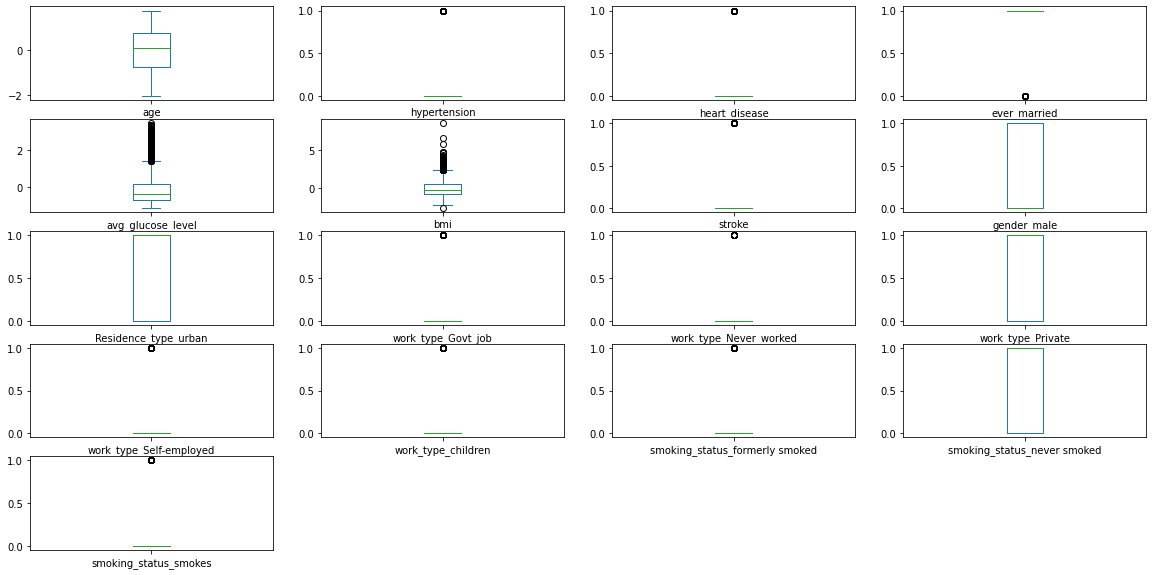

In [52]:
df3.plot(kind='box', subplots=True, figsize=(20,10),
              layout=(-1, 4), sharex=False)
plt.plot()

[]

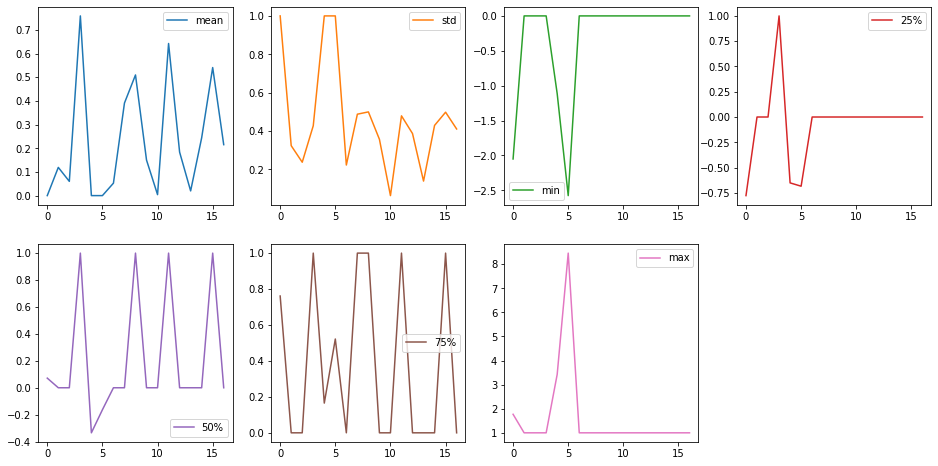

In [54]:
desc = df3.describe().transpose()
desc_copy = desc.reset_index(drop=True).drop('count', axis=1)
desc_copy.plot(kind='line', subplots=True, figsize=(16,8),
              layout=(-1, 4), sharex=False)
plt.plot()

In [55]:
desc = df3.describe().transpose()

In [56]:
desc_copy = desc.reset_index(drop=True).drop('count', axis=1)

[]

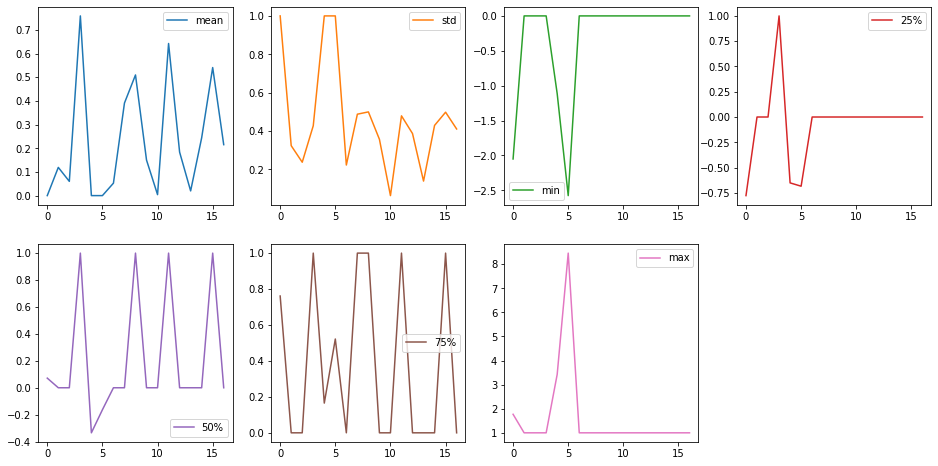

In [57]:
desc_copy.plot(kind='line', subplots=True, figsize=(16,8),
              layout=(-1, 4), sharex=False)
plt.plot()

In [58]:
df3['stroke'].value_counts()

0    3245
1     180
Name: stroke, dtype: int64

# Splitting data into X and y

In [59]:
X = df3.drop("stroke", axis = 1)
y = df3.stroke

# Oversampling the data using ADASYN 

In [60]:
# Apply ADASYN to address class imbalance in the training set
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# Optionally, you can print the shapes to verify the sizes of the datasets
print("X_train_resampled shape:", X_train.shape)
print("y_train_resampled shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train_resampled shape: (4183, 16)
y_train_resampled shape: (4183,)
X_val shape: (1046, 16)
y_val shape: (1046,)
X_test shape: (1308, 16)
y_test shape: (1308,)


In [61]:
Counter(y_test)

Counter({1: 629, 0: 679})

In [62]:
Counter(y_val)

Counter({0: 503, 1: 543})

In [63]:
Counter(y_train)

Counter({1: 2120, 0: 2063})

# Applying Different Stacking Combination

# Simple Stacking

>lr 0.798 (0.014)
>knn 0.881 (0.013)
>RFC 0.930 (0.011)
>svm 0.859 (0.017)
>GB 0.864 (0.016)
>stacking 0.913 (0.011)


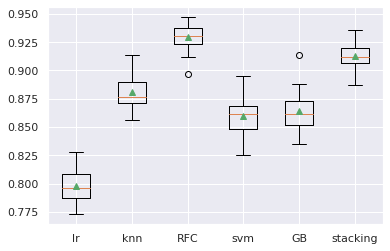

In [212]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    
    
    
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['RFC']=RandomForestClassifier()
    models['svm'] = SVC()
    models['GB']=GradientBoostingClassifier()
    models['stacking'] = get_stacking()
    
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Hyperparameter Tunning

In [65]:
from sklearn.model_selection import RandomizedSearchCV

knn= KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],        
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]                
}



random_search_knn = RandomizedSearchCV(knn, param_distributions=param_grid_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_knn.fit(X_train, y_train)


best_params_knn = random_search_knn.best_params_
print("Best Hyperparameters for knn:", best_params_knn)




Best Hyperparameters for knn: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}


In [66]:

rfc = RandomForestClassifier()
param_grid_rfc = {
    'n_estimators': [50, 100, 200],     
    'max_depth': [None, 10, 20, 30],    
    'min_samples_split': [2, 5, 10],    
    'min_samples_leaf': [1, 2, 4]       
    
}

random_search_rfc = RandomizedSearchCV(rfc, param_distributions=param_grid_rfc, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rfc.fit(X_train, y_train)

best_params_rfc = random_search_rfc.best_params_
print("Best Hyperparameters for Random Forrest Classifier:", best_params_rfc)

Best Hyperparameters for Random Forrest Classifier: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [67]:
svc=SVC()
param_grid_svc = {
    'C': [0.1, 1, 10],            
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto', 0.1, 0.01],  
    'degree': [2, 3, 4],           
    'coef0': [0.0, 1.0, 2.0]       
}

random_search_svc = RandomizedSearchCV(svc, param_distributions=param_grid_svc, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_svc.fit(X_train, y_train)

best_params_svc = random_search_svc.best_params_
print("Best Hyperparameters for svc:", best_params_svc)

Best Hyperparameters for svc: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 2.0, 'C': 10}


In [68]:
gb=GradientBoostingClassifier()


param_dist_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
}

random_search_gb = RandomizedSearchCV(gb, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_gb.fit(X_train, y_train)

best_params_gb = random_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting Classifier:", best_params_gb)


Best Hyperparameters for Gradient Boosting Classifier: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.2}


In [69]:
lr = LogisticRegression()

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    
    'penalty': ['l1', 'l2'],                
    'solver': ['liblinear', 'saga']         
  
}
random_search_lr = RandomizedSearchCV(lr, param_distributions=param_grid_lr, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_lr.fit(X_train, y_train)

best_params_lr = random_search_lr.best_params_
print("Best Hyperparameters for lr:", best_params_lr)

Best Hyperparameters for lr: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


>lr 0.797 (0.014)
>knn 0.903 (0.011)
>RFC 0.925 (0.012)
>svm 0.898 (0.016)
>GB 0.949 (0.009)
>stacking 0.952 (0.009)


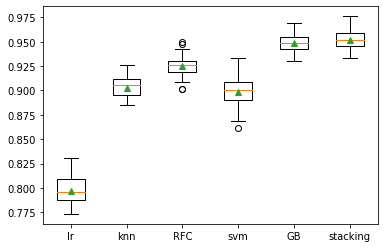

In [70]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    
    level0.append(('knn', KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance')))
    level0.append(('RFC', RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100,random_state=42)))
    level0.append(('GB',GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_depth= 7, learning_rate= 0.2,random_state=42)))
    
    # define meta learner model
    level1 = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear')
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear',random_state=42)
    models['knn']=KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance')
    models['RFC']=RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100,random_state=42)
    models['svm']= SVC(kernel= 'rbf', gamma= 'scale', degree= 3, coef0= 2.0, C= 10,random_state=42)
    models['GB']=GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_depth= 7, learning_rate= 0.2,random_state=42)
    models['stacking'] = get_stacking()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [185]:
level0 = list()

level0.append(('knn', KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance')))
level0.append(('RFC', RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100,random_state=42)))
level0.append(('GB',GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_depth= 7, learning_rate= 0.2,random_state=42)))
    
    # define meta learner model
level1 = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear')
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

model.fit(X_train, y_train)

                           
                           






StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(n_neighbors=3, p=1,
                                                     weights='distance')),
                               ('RFC',
                                RandomForestClassifier(min_samples_split=5,
                                                       random_state=42)),
                               ('GB',
                                GradientBoostingClassifier(learning_rate=0.2,
                                                           max_depth=7,
                                                           min_samples_leaf=2,
                                                           min_samples_split=10,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(C=10, penalty='l1',
                                                      solver='liblinear'))

# Validation Prediction

In [186]:

val_prediction = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_prediction)
val_classification_report = classification_report(y_val, val_prediction)


print('Validation of Stacking Accuracy: %.3f' % (val_accuracy))
print('Validation Classification Report: ')
print(val_classification_report)



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, matthews_corrcoef


def print_classification_metrics(y_true, y_pred):
    # 1. Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy}')

    # 2. Precision
    precision = precision_score(y_true, y_pred)
    print(f'Precision: {precision}')

    # 3. Recall
    recall = recall_score(y_true, y_pred)
    print(f'Recall: {recall}')

    # 4. F1 Score
    f1 = f1_score(y_true, y_pred)
    print(f'F1 Score: {f1}')

    # 5. Specificity
    specificity = confusion_matrix(y_true, y_pred)[0, 0] / (confusion_matrix(y_true, y_pred)[0, 0] + confusion_matrix(y_true, y_pred)[0, 1])
    print(f'Specificity: {specificity}')

    # 6. False Positive Rate (FPR)
    fpr = confusion_matrix(y_true, y_pred)[0, 1] / (confusion_matrix(y_true, y_pred)[0, 0] + confusion_matrix(y_true, y_pred)[0, 1])
    print(f'False Positive Rate: {fpr}')

    # 7. Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f'AUC-ROC: {roc_auc}')

    # 8. Area Under the Precision-Recall (PR) Curve (AUC-PR)
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)
    print(f'AUC-PR: {pr_auc}')

    # 9. Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f'Matthews Correlation Coefficient: {mcc}')




Validation of Stacking Accuracy: 0.957
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       503
           1       0.94      0.98      0.96       543

    accuracy                           0.96      1046
   macro avg       0.96      0.96      0.96      1046
weighted avg       0.96      0.96      0.96      1046



- Stacking Accuracy on Validation Dataset: 0.957

- Validation Dataset Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       503
           1       0.94      0.98      0.96       543

    accuracy                           0.96      1046
   macro avg       0.96      0.96      0.96      1046
weighted avg       0.96      0.96      0.96      1046



In [188]:
from sklearn import metrics

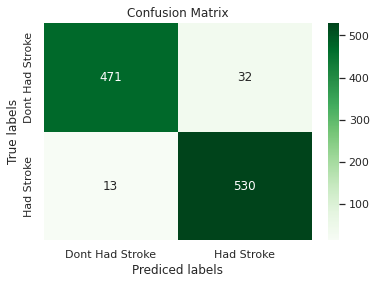

Accuracy: 0.9569789674952199
Precision: 0.9430604982206405
Recall: 0.9760589318600368
F1 Score: 0.9592760180995474
Specificity: 0.9363817097415507
False Positive Rate: 0.0636182902584493
AUC-ROC: 0.9562203208007938
AUC-PR: 0.9657738641799181
Matthews Correlation Coefficient: 0.91431888467976


In [189]:


y_true = y_val
y_pred = val_prediction

plot_confusion_matrix(y_true, y_pred)
print_classification_metrics(y_true, y_pred)


# Testing Prediction

In [190]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)
test_classification_report = classification_report(y_test, test_prediction)


print('Validation of Stacking Accuracy: %.3f' % (test_accuracy))
print('Validation Classification Report: ')
print(test_classification_report)


Validation of Stacking Accuracy: 0.949
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       679
           1       0.95      0.94      0.95       629

    accuracy                           0.95      1308
   macro avg       0.95      0.95      0.95      1308
weighted avg       0.95      0.95      0.95      1308



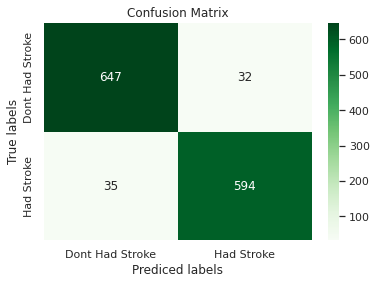

Accuracy: 0.9487767584097859
Precision: 0.9488817891373802
Recall: 0.9443561208267091
F1 Score: 0.9466135458167331
Specificity: 0.9528718703976435
False Positive Rate: 0.047128129602356406
AUC-ROC: 0.9486139956121763
AUC-PR: 0.9599981598750109
Matthews Correlation Coefficient: 0.897395050581138


In [191]:

y_true = y_test
y_pred = test_prediction


plot_confusion_matrix(y_true, y_pred)
print_classification_metrics(y_true, y_pred)

# Stacking Model Interpretability:

In [192]:
import lime
import lime.lime_tabular


In [193]:
# Assuming model is your machine learning model
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=list(X_train.columns), class_names=['0', '1'], discretize_continuous=True)


In [194]:
instance = X_test.iloc[0]

# Assuming instance is a specific instance from your dataset
explanation = explainer.explain_instance(instance.values, model.predict_proba)


In [195]:
# Visualize the explanation
explanation.show_in_notebook()


#### For above case the y_test.iloc[0] is 1, hence we can look at the features which which played important role in classifying the label

In [214]:
X_test.iloc[0]

age                               0.372500
hypertension                      0.000000
heart_disease                     0.000000
ever_married                      1.000000
avg_glucose_level                -0.090028
bmi                               0.130134
gender_male                       1.000000
Residence_type_urban              0.000000
work_type_Govt_job                0.000000
work_type_Never_worked            0.000000
work_type_Private                 0.000000
work_type_Self-employed           0.000000
work_type_children                0.000000
smoking_status_formerly smoked    0.000000
smoking_status_never smoked       0.000000
smoking_status_smokes             1.000000
Name: 5809, dtype: float64

In [215]:
y_test.iloc[0]

1

In [213]:
0.19+0.16+0.15+0.14+0.09

0.73

In [196]:
y_test.iloc[50]

0

In [197]:
instance = X.iloc[50]

# Assuming instance is a specific instance from your dataset
explanation = explainer.explain_instance(instance.values, model.predict_proba)
# Visualize the explanation
explanation.show_in_notebook()

#### For above case the y_test.iloc[53] is 0, hence we can look at the features which which played important role in classifying the label

# Blending Stacking Ensemble Model

In [216]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import clone
import numpy as np


In [223]:
# Train individual models
modelBlend1 = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100,random_state=42)
modelBlend2 = GradientBoostingClassifier(subsample= 1.0, n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_depth= 7, learning_rate= 0.2,random_state=42)
modelBlend3 = LogisticRegression(C= 10, penalty= 'l1', solver= 'liblinear',random_state=42)

# Train models on the training set
modelBlend1.fit(X_train, y_train)
modelBlend2.fit(X_train, y_train)
modelBlend3.fit(X_train, y_train)

# Make predictions on the validation set
pred1 = modelBlend1.predict(X_val)
pred2 = modelBlend2.predict(X_val)
pred3 = modelBlend3.predict(X_val)

# Create a meta-model (blender) to combine predictions
blender = LogisticRegression(random_state=42)

# Train the blender on the validation set predictions
blender.fit(np.column_stack((pred1, pred2, pred3)), y_val)

# Make predictions on new data
new_data = X_test  # Your new data
pred1_new = modelBlend1.predict(new_data)
pred2_new = modelBlend2.predict(new_data)
pred3_new = modelBlend3.predict(new_data)

# Combine predictions using the blender
final_predictions = blender.predict(np.column_stack((pred1_new, pred2_new, pred3_new)))

# Evaluate the performance
accuracy = accuracy_score(y_test, final_predictions)
print(f"Blend Ensemble Model Accuracy: {accuracy}")


Blend Ensemble Model Accuracy: 0.941131498470948


In [224]:
test_classification_report = classification_report(y_test, final_predictions)


print('Validation of Blending Stacking Accuracy: %.3f' % (accuracy))
print('Validation Classification Report: ')
print(test_classification_report)



Validation of Blending Stacking Accuracy: 0.941
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       679
           1       0.95      0.93      0.94       629

    accuracy                           0.94      1308
   macro avg       0.94      0.94      0.94      1308
weighted avg       0.94      0.94      0.94      1308



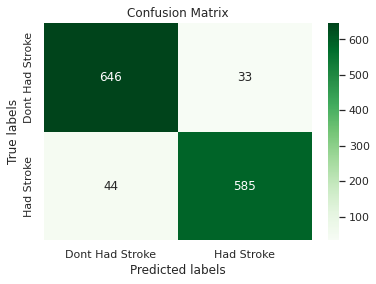

Accuracy: 0.941131498470948
Precision: 0.9466019417475728
Recall: 0.9300476947535771
F1 Score: 0.9382518043303929
Specificity: 0.9513991163475699
False Positive Rate: 0.048600883652430045
AUC-ROC: 0.9407234055505734
AUC-PR: 0.9551443901160184
Matthews Correlation Coefficient: 0.8821400458478926


In [225]:
# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
y_true = y_test
y_pred = final_predictions

plot_confusion_matrix(y_true, y_pred)
print_classification_metrics(y_true, y_pred)

# Blending Stacking Model Interpretation

In [226]:
from sklearn.metrics import accuracy_score
from interpret import show
from interpret.blackbox import ShapKernel
import shap
import numpy as np

In [227]:
explainer = shap.Explainer(blender, np.column_stack((pred1_new, pred2_new, pred3_new)))


In [228]:
X_test.iloc[:100, :]

age  hypertension  heart_disease  ever_married  avg_glucose_level  \
5809  0.372500             0              0             1          -0.090028   
233   1.557120             1              0             1           1.549028   
1032  0.124551             0              0             1           0.059085   
5995  1.687703             0              0             0          -0.541164   
2264  0.124551             0              0             0           2.324084   
...        ...           ...            ...           ...                ...   
4704  1.502026             0              0             1          -0.822458   
6202  1.610178             0              0             1          -0.679828   
2623 -0.565204             0              0             1          -0.089763   
4077 -0.719898             0              0             1          -0.841318   
4913  1.114497             0              0             1          -0.667392   

           bmi  gender_male  Residence_type_urban  work_type_Govt_job  \
5809  0.130134            1                     0                   0   
233   0.028466            0                     1                   0   
1032  0.330054            1                     0                   0   
5995 -0.963309            0                     0                   0   
2264 -0.067494            1                     0                   0   
...        ...          ...                   ...                 ...   
4704 -0.726564            0                     1                   0   
6202 -0.348782            0                     0                   0   
2623  2.331504            0                     0                   0   
4077  0.507977            0                     0                   0   
4913 -0.238861            1                     1                   0   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
5809                       0                  0                        0   
233                        0                  1                        0   
1032                       0                  1                        0   
5995                       0                  1                        0   
2264                       0                  0                        1   
...                      ...                ...                      ...   
4704                       0                  0                        0   
6202                       0                  1                        0   
2623                       0                  1                        0   
4077                       0                  1                        0   
4913                       0                  0                        0   

      work_type_children  smoking_status_formerly smoked  \
5809                   0                               0   
233                    0                               1   
1032                   0                               1   
5995                   0                               0   
2264                   0                               0   
...                  ...                             ...   
4704                   0                               0   
6202                   0                               0   
2623                   0                               0   
4077                   0                               0   
4913                   0                               0   

      smoking_status_never smoked  smoking_status_smokes  
5809                            0                      1  
233                             0                      0  
1032                            0                      0  
5995                            1                      0  
2264                            1                      0  
...                           ...                    ...  
4704                            1                      0  
6202                            1                      0  
2623    

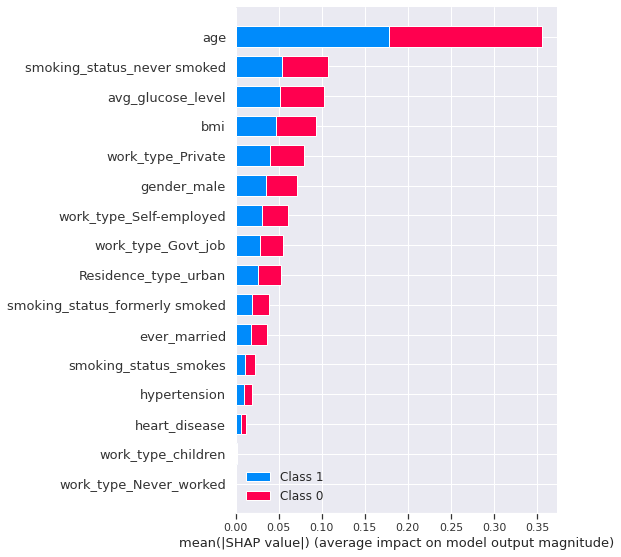

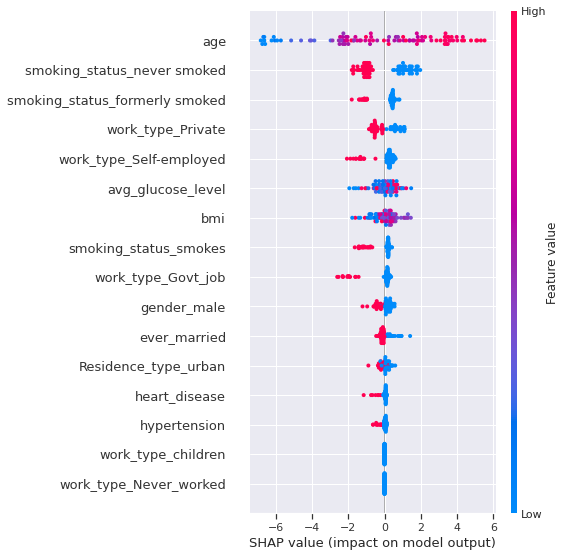

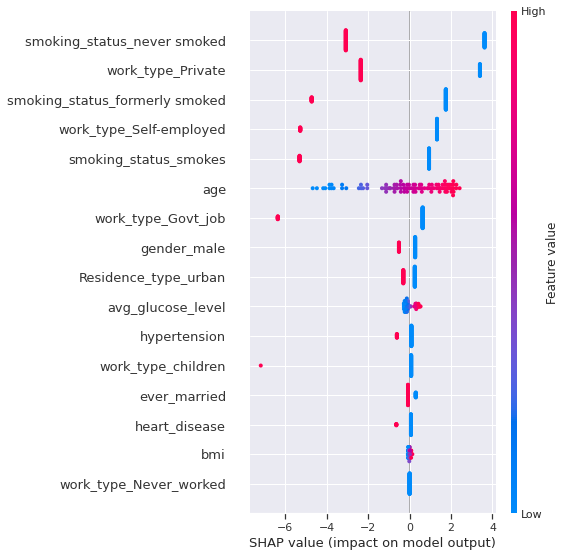

In [230]:

# Initialize SHAP explainer for each individual model
explainer1 = shap.Explainer(modelBlend1, X_train)
explainer2 = shap.Explainer(modelBlend2, X_train)
explainer3 = shap.Explainer(modelBlend3, X_train)

# Calculate SHAP values for a subset of the test data for each individual model
shap_values1 = explainer1.shap_values(X_test.iloc[:100, :],check_additivity=False)
shap_values2 = explainer2.shap_values(X_test.iloc[:100, :])
shap_values3 = explainer3.shap_values(X_test.iloc[:100, :])

# Visualize SHAP summary plots for each individual model
shap.summary_plot(shap_values1, X_test.iloc[:100, :])
shap.summary_plot(shap_values2, X_test.iloc[:100, :])
shap.summary_plot(shap_values3, X_test.iloc[:100, :])

# Deep learning model

In [235]:
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout
from numpy import dstack
from sklearn.linear_model import LogisticRegression

In [236]:
model1 = Sequential()
model1.add(Dense(50,activation = 'relu',input_dim = 16))
model1.add(Dense(25,activation = 'relu'))
model1.add(Dense(1,activation = 'sigmoid'))

In [237]:

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 50)                850       
                                                                 
 dense_33 (Dense)            (None, 25)                1275      
                                                                 
 dense_34 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2151 (8.40 KB)
Trainable params: 2151 (8.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [238]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [239]:
X_train.shape

(4183, 16)

In [240]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history = model1.fit(X_train, y_train,validation_data = (X_val,y_val),epochs = 100)

Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.5103 - f1_m: 0.7666 - val_loss: 0.4698 - val_f1_m: 0.7904
Epoch 2/100
131/131 [==============================] - 0s 913us/step - loss: 0.4470 - f1_m: 0.7989 - val_loss: 0.4500 - val_f1_m: 0.8074
Epoch 3/100
131/131 [==============================] - 0s 949us/step - loss: 0.4255 - f1_m: 0.8084 - val_loss: 0.4299 - val_f1_m: 0.8034
Epoch 4/100
131/131 [==============================] - 0s 966us/step - loss: 0.4054 - f1_m: 0.8160 - val_loss: 0.4174 - val_f1_m: 0.8067
Epoch 5/100
131/131 [==============================] - 0s 909us/step - loss: 0.3911 - f1_m: 0.8270 - val_loss: 0.4002 - val_f1_m: 0.8202
Epoch 6/100
131/131 [==============================] - 0s 915us/step - loss: 0.3743 - f1_m: 0.8389 - val_loss: 0.3863 - val_f1_m: 0.8290
Epoch 7/100
131/131 [==============================] - 0s 903us/step - loss: 0.3632 - f1_m: 0.8450 - val_loss: 0.3762 - val_f1_m: 0.8459
Epoch 8/100
131/131 [======================

Epoch 61/100
131/131 [==============================] - 0s 925us/step - loss: 0.1805 - f1_m: 0.9303 - val_loss: 0.2787 - val_f1_m: 0.8909
Epoch 62/100
131/131 [==============================] - 0s 980us/step - loss: 0.1730 - f1_m: 0.9396 - val_loss: 0.2902 - val_f1_m: 0.9055
Epoch 63/100
131/131 [==============================] - 0s 955us/step - loss: 0.1726 - f1_m: 0.9383 - val_loss: 0.2672 - val_f1_m: 0.9086
Epoch 64/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1712 - f1_m: 0.9396 - val_loss: 0.2772 - val_f1_m: 0.9051
Epoch 65/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1705 - f1_m: 0.9403 - val_loss: 0.2706 - val_f1_m: 0.9097
Epoch 66/100
131/131 [==============================] - 0s 983us/step - loss: 0.1663 - f1_m: 0.9413 - val_loss: 0.2817 - val_f1_m: 0.9069
Epoch 67/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1686 - f1_m: 0.9433 - val_loss: 0.2666 - val_f1_m: 0.9066
Epoch 68/100
131/131 [==================

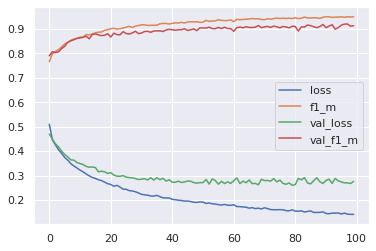

In [241]:
plt.plot(history.history['loss'])
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [242]:
model1.save('model1.h5')

In [243]:
model2 = Sequential()
model2.add(Dense(25,activation = 'relu',input_dim = 16))
model2.add(Dense(25,activation = 'relu'))
model2.add(Dense(10,activation = 'relu'))
model2.add(Dense(1,activation = 'sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history1 = model2.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100)

Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.5605 - f1_m: 0.5442 - val_loss: 0.4698 - val_f1_m: 0.8091
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4481 - f1_m: 0.7950 - val_loss: 0.4452 - val_f1_m: 0.7929
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4262 - f1_m: 0.8042 - val_loss: 0.4282 - val_f1_m: 0.8022
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4074 - f1_m: 0.8160 - val_loss: 0.4145 - val_f1_m: 0.8160
Epoch 5/100
131/131 [==============================] - 0s 975us/step - loss: 0.3925 - f1_m: 0.8225 - val_loss: 0.4029 - val_f1_m: 0.8206
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3752 - f1_m: 0.8349 - val_loss: 0.3888 - val_f1_m: 0.8439
Epoch 7/100
131/131 [==============================] - 0s 995us/step - loss: 0.3598 - f1_m: 0.8409 - val_loss: 0.3826 - val_f1_m: 0.8523
Epoch 8/100
131/131 [==============================

131/131 [==============================] - 0s 1ms/step - loss: 0.1694 - f1_m: 0.9413 - val_loss: 0.3013 - val_f1_m: 0.8979
Epoch 62/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1709 - f1_m: 0.9407 - val_loss: 0.2797 - val_f1_m: 0.8896
Epoch 63/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1695 - f1_m: 0.9361 - val_loss: 0.2905 - val_f1_m: 0.9053
Epoch 64/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1680 - f1_m: 0.9407 - val_loss: 0.2802 - val_f1_m: 0.9050
Epoch 65/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1661 - f1_m: 0.9400 - val_loss: 0.3119 - val_f1_m: 0.9030
Epoch 66/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1654 - f1_m: 0.9430 - val_loss: 0.2766 - val_f1_m: 0.9081
Epoch 67/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1663 - f1_m: 0.9399 - val_loss: 0.2835 - val_f1_m: 0.9045
Epoch 68/100
131/131 [==============================] - 0s 2m

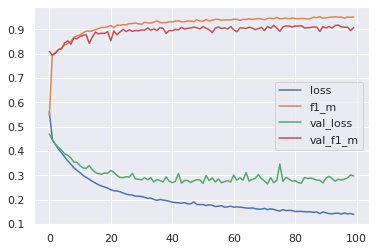

In [244]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['f1_m'])
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [245]:
model2.save('model2.h5')

In [246]:
model3 = Sequential()
model3.add(Dense(50,activation = 'relu',input_dim = 16))
model3.add(Dense(25,activation = 'relu'))
model3.add(Dense(25,activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(Dense(10,activation = 'relu'))
model3.add(Dense(1,activation = 'sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history3 = model3.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100)

Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.5320 - f1_m: 0.7546 - val_loss: 0.4580 - val_f1_m: 0.8052
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4413 - f1_m: 0.8037 - val_loss: 0.4296 - val_f1_m: 0.8134
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.4089 - f1_m: 0.8177 - val_loss: 0.4078 - val_f1_m: 0.8211
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3810 - f1_m: 0.8392 - val_loss: 0.3945 - val_f1_m: 0.8191
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3562 - f1_m: 0.8545 - val_loss: 0.3596 - val_f1_m: 0.8639
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3313 - f1_m: 0.8656 - val_loss: 0.3447 - val_f1_m: 0.8746
Epoch 7/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3078 - f1_m: 0.8726 - val_loss: 0.3359 - val_f1_m: 0.8695
Epoch 8/100
131/131 [==============================] - 

131/131 [==============================] - 0s 1ms/step - loss: 0.1103 - f1_m: 0.9609 - val_loss: 0.3350 - val_f1_m: 0.9202
Epoch 62/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1195 - f1_m: 0.9594 - val_loss: 0.3085 - val_f1_m: 0.9180
Epoch 63/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1182 - f1_m: 0.9551 - val_loss: 0.3226 - val_f1_m: 0.9203
Epoch 64/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1108 - f1_m: 0.9617 - val_loss: 0.3387 - val_f1_m: 0.9122
Epoch 65/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1148 - f1_m: 0.9593 - val_loss: 0.3221 - val_f1_m: 0.9161
Epoch 66/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1120 - f1_m: 0.9622 - val_loss: 0.3087 - val_f1_m: 0.9167
Epoch 67/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1103 - f1_m: 0.9625 - val_loss: 0.3371 - val_f1_m: 0.9211
Epoch 68/100
131/131 [==============================] - 0s 1m

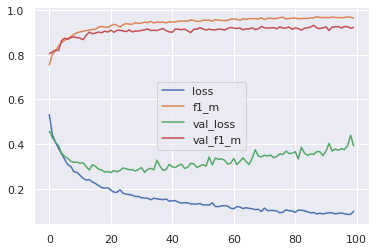

In [247]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['f1_m'])
plt.plot(history3.history['val_loss'])
plt.plot(history3.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [248]:
model3.save('model3.h5')

In [249]:
model4 = Sequential()
model4.add(Dense(50,activation = 'relu',input_dim = 16))
model4.add(Dense(25,activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(10,activation = 'relu'))
model4.add(Dense(1,activation = 'sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history4 = model4.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100)

Epoch 1/100
131/131 [==============================] - 1s 2ms/step - loss: 0.5832 - f1_m: 0.7471 - val_loss: 0.4820 - val_f1_m: 0.7843
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4652 - f1_m: 0.7839 - val_loss: 0.4436 - val_f1_m: 0.8050
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4373 - f1_m: 0.8028 - val_loss: 0.4288 - val_f1_m: 0.8155
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 0.4124 - f1_m: 0.8123 - val_loss: 0.4101 - val_f1_m: 0.8172
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3929 - f1_m: 0.8185 - val_loss: 0.4044 - val_f1_m: 0.8061
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3746 - f1_m: 0.8391 - val_loss: 0.3882 - val_f1_m: 0.8388
Epoch 7/100
131/131 [==============================] - 0s 1ms/step - loss: 0.3644 - f1_m: 0.8470 - val_loss: 0.3740 - val_f1_m: 0.8434
Epoch 8/100
131/131 [==============================] - 

131/131 [==============================] - 0s 1ms/step - loss: 0.1566 - f1_m: 0.9388 - val_loss: 0.2556 - val_f1_m: 0.9141
Epoch 62/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1529 - f1_m: 0.9469 - val_loss: 0.2784 - val_f1_m: 0.8984
Epoch 63/100
131/131 [==============================] - 0s 982us/step - loss: 0.1533 - f1_m: 0.9444 - val_loss: 0.2607 - val_f1_m: 0.9136
Epoch 64/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1557 - f1_m: 0.9435 - val_loss: 0.2742 - val_f1_m: 0.9093
Epoch 65/100
131/131 [==============================] - 0s 993us/step - loss: 0.1474 - f1_m: 0.9490 - val_loss: 0.2607 - val_f1_m: 0.9155
Epoch 66/100
131/131 [==============================] - 0s 1ms/step - loss: 0.1576 - f1_m: 0.9401 - val_loss: 0.2628 - val_f1_m: 0.9140
Epoch 67/100
131/131 [==============================] - 0s 980us/step - loss: 0.1478 - f1_m: 0.9473 - val_loss: 0.2673 - val_f1_m: 0.9161
Epoch 68/100
131/131 [==============================] -

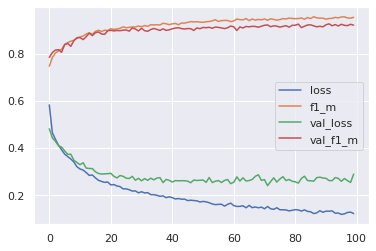

In [250]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['f1_m'])
plt.plot(history4.history['val_loss'])
plt.plot(history4.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [251]:
model4.save('model4.h5')

In [252]:

dependencies = {
    'f1_m': f1_m
}


In [253]:

# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = '/home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename,custom_objects=dependencies)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

In [254]:
n_members = 4
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded /home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model1.h5
>loaded /home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model2.h5
>loaded /home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model3.h5
>loaded /home/himanshu/Documents/upgrad M.Sc/ENSEMBLE-BASED-PREDICTIONS-OF-BRAIN-STROKES/model4.h5
Loaded 4 models


In [255]:

# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
    stackX = None
    for model in members:
        # make prediction
        yhat = model.predict(inputX, verbose=0)
        # stack predictions into [rows, members, probabilities]
        if stackX is None:
            stackX = yhat #
        else:
            stackX = dstack((stackX, yhat))
    # flatten predictions to [rows, members x probabilities]
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
    return stackX

In [256]:


# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # fit standalone model
    model = LogisticRegression() #meta learner
    model.fit(stackedX, inputy)
    return model

In [257]:
model = fit_stacked_model(members, X_val,y_val)

In [258]:


# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # make a prediction
    yhat = model.predict(stackedX)
    return yhat

In [259]:
# evaluate model on test set
yhat = stacked_prediction(members, model, X_test)
score = f1_m(y_test/1.0, yhat/1.0)
print('Stacked F Score:', score)
     

Stacked F Score: tf.Tensor(0.9296209862424205, shape=(), dtype=float64)


In [260]:
test_classification_report = classification_report(y_test, yhat)


print('Validation of Stacking Accuracy: %.3f' % (score))
print('Validation Classification Report: ')
print(test_classification_report)

Validation of Stacking Accuracy: 0.930
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       679
           1       0.91      0.96      0.93       629

    accuracy                           0.93      1308
   macro avg       0.93      0.93      0.93      1308
weighted avg       0.93      0.93      0.93      1308



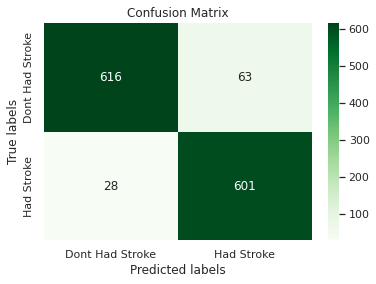

Accuracy: 0.9304281345565749
Precision: 0.9051204819277109
Recall: 0.9554848966613673
F1 Score: 0.9296210363495746
Specificity: 0.9072164948453608
False Positive Rate: 0.09278350515463918
AUC-ROC: 0.931350695753364
AUC-PR: 0.9410060532089121
Matthews Correlation Coefficient: 0.862171643634729


In [261]:
# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
y_true = y_test
y_pred = yhat

plot_confusion_matrix(y_true, y_pred)
print_classification_metrics(y_true, y_pred)

In [ ]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score],
    'Delta_t' : [delta_rf, delta_lr, delta_svc, delta_tree, delta_knn]
})

result